In [1]:
# Import modules
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import xlrd
import os
from pathlib import Path


In [52]:
# List path to excel data files
path = Path("./State Data")
files = os.listdir(path)

In [53]:
# Create lists for states and data
states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", 
         "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", 
         "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", 
         "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", 
         "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", 
         "Wisconsin", "Wyoming"] 
list_df = []

# Search files for state name and data
for f in files:
    data = pd.read_excel((path / f),'BLS Data Series', skiprows=12)
    list_df.append(data)

# Create DataFrame of data
total = pd.concat(list_df)
total = total.reset_index(drop=True)

# Create DataFrame of state names to match lines of data
names = pd.Series(states)
names = names.repeat(11)
names = pd.DataFrame({"State" : names})
names = names.reset_index(drop=True)

# Join data and state name DataFrames
total_states = total.join(names)

total_states.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,State
0,2008,2028.1,2028.2,2024.0,2026.4,2021.8,2017.0,2014.7,2009.8,2004.4,1993.8,1978.6,1970.6,Alabama
1,2009,1947.0,1933.8,1922.2,1915.1,1909.3,1901.6,1898.7,1892.0,1886.8,1882.2,1884.7,1883.1,Alabama
2,2010,1881.7,1879.3,1883.1,1886.3,1898.3,1896.5,1895.7,1891.5,1887.1,1894.4,1892.2,1891.0,Alabama
3,2011,1886.4,1889.3,1889.9,1889.0,1887.9,1884.0,1890.9,1890.7,1895.0,1891.8,1893.4,1892.5,Alabama
4,2012,1899.1,1899.2,1904.9,1906.1,1903.0,1904.0,1901.7,1905.9,1908.3,1911.8,1913.3,1912.7,Alabama


In [55]:
# Get stats on year change, average, and median
total_states["Year Change"] = total_states["Dec"] - total_states["Jan"]
total_states["Year Average"] = total_states.iloc[:, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].mean(axis=1)
total_states["Year Median"] = total_states.iloc[:, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].median(axis=1)

total_states.reset_index(drop=True)
total_states.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,State,Year Change,Year Average,Year Median
0,2008,2028.1,2028.2,2024.0,2026.4,2021.8,2017.0,2014.7,2009.8,2004.4,1993.8,1978.6,1970.6,Alabama,-57.5,2008.118182,2014.7
1,2009,1947.0,1933.8,1922.2,1915.1,1909.3,1901.6,1898.7,1892.0,1886.8,1882.2,1884.7,1883.1,Alabama,-63.9,1900.863636,1898.7
2,2010,1881.7,1879.3,1883.1,1886.3,1898.3,1896.5,1895.7,1891.5,1887.1,1894.4,1892.2,1891.0,Alabama,9.3,1890.490909,1891.5
3,2011,1886.4,1889.3,1889.9,1889.0,1887.9,1884.0,1890.9,1890.7,1895.0,1891.8,1893.4,1892.5,Alabama,6.1,1890.400000,1890.7
4,2012,1899.1,1899.2,1904.9,1906.1,1903.0,1904.0,1901.7,1905.9,1908.3,1911.8,1913.3,1912.7,Alabama,13.6,1906.445455,1905.9


In [5]:
# Group states into BLS Regions
# New England—includes the states of Connecticut-09, Maine-23, Massachusetts-25, New Hampshire-33, Rhode Island-44, and Vermont-50.
# New York-New Jersey—includes the states of New Jersey-34, New York-36, Puerto Rico, and U.S. Virgin Islands.
# Mid-Atlantic—includes the states of Pennsylvania-42, Delaware-10, District of Columbia, Maryland-24, Virginia-51, and West Virginia-54.
# Southeast—includes the states of Alabama-01, Florida-12, Georgia-13, Kentucky-21, Mississippi-28, North Carolina-37, South Carolina-45, and Tennessee-47.
# Midwest—includes the states of Illinois-17, Indiana-18, Iowa-19, Michigan-26, Minnesota-27, Nebraska-31, North Dakota-38, Ohio-39, South Dakota-46, and Wisconsin-55.
# Southwest—includes the states of Arkansas-05, Louisiana-22, New Mexico-35, Oklahoma-40, and Texas-48.
# Mountain-Plains—includes the states of Colorado-08, Kansas-20, Missouri-29, Montana-30, Utah-49, and Wyoming-56.
# Western—includes the states of Alaska-02, Arizona-04, California-06, Hawaii-15, Idaho-16, Nevada-32, Oregon-41, and Washington-53.

new_england_states = ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont"]
new_york_states = ["New York", "New Jersey"]                                                       
mid_atlantic_states = ["Pennsylvania", "Delaware", "Maryland", "Virginia", "West Virginia"]
southeast_states = ["Alabama", "Florida", "Georgia", "Kentucky", "Mississippi", "North Carolina", "South Carolina", "Tennessee"]
midwest_states = ["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin"]
southwest_states = ["Arkansas", "Louisiana", "New Mexico", "Oklahoma", "Texas"]                                                       
mountain_plains_states = ["Colorado", "Kansas", "Missouri", "Montana", "Utah", "Wyoming"]
western_states = ["Alaska", "Arizona", "California", "Hawaii", "Idaho", "Nevada", "Oregon", "Washington"]


In [6]:
# Create dataframes for each state group
grouped_df = []
grouped_states = [new_england_states, new_york_states, mid_atlantic_states, southeast_states, midwest_states, southwest_states, mountain_plains_states, western_states]
region = ["New England", "New York", "Mid-Atlantic", "Southeast", "Midwest", "Southwest", "Mountain Plains", "Western"]

for groups in grouped_states:
    grouped_data = total_states.loc[total_states["State"].isin(groups)].sort_values("Year")
    grouped_df.append(grouped_data)
    
# Find beginning and ending employment numbers for time frame to find size of regions
beg_sums = []
end_sums = []

for df in grouped_df:
    beg_df = df.loc[df["Year"] == 2008, :]
    beg_sum = beg_df["Jan"].sum()
    beg_sums.append(beg_sum)
    end_df = df.loc[df["Year"] == 2018, :]
    end_sum = end_df["Dec"].sum()
    end_sums.append(end_sum)
    
region_beg_size = pd.DataFrame({"Region" : region, 
                               "2008 Employment" : beg_sums})
region_end_size = pd.DataFrame({"Region" : region, 
                               "2018 Employment" : end_sums})

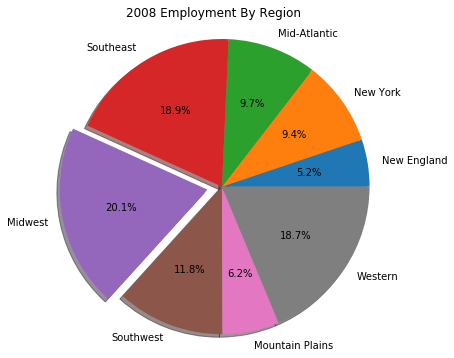

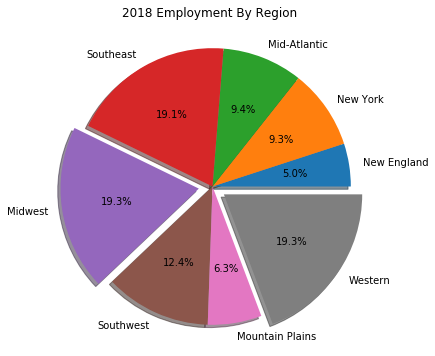

In [62]:
# Create pie charts for sizes of regions from beginning of time frame (2008) to end of time frame (2018)

plt.figure(figsize=(6, 6))
plt.pie(region_beg_size["2008 Employment"], labels = region_beg_size["Region"], autopct="%1.1f%%", 
        shadow=True, explode = (0,0,0,0,0.1,0,0,0))
plt.axis("equal")
plt.title("2008 Employment By Region")
plt.savefig("./Region Figs/pie_chart_2008.png")
plt.show()

plt.figure(figsize=(6, 6))
plt.pie(region_end_size["2018 Employment"], labels = region_end_size["Region"], autopct="%1.1f%%",  
        shadow=True, explode = (0,0,0,0,0.1,0,0,0.1))
plt.axis("equal")
plt.title("2018 Employment By Region")
plt.savefig("./Region Figs/pie_chart_2019.png")
plt.show()


In [16]:
# Sum months for states in regions over the years

jans = []
febs = []
mars = []
aprs = []
mays = []
juns = []
juls = []
augs = []
seps = []
octs = []
novs = []
decs = []
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

for regions in grouped_df: 
    for year in years:
        dfs = regions.loc[regions["Year"] == year, :]
        jans.append(dfs["Jan"].sum())
        febs.append(dfs["Feb"].sum())
        mars.append(dfs["Mar"].sum())
        aprs.append(dfs["Apr"].sum())
        mays.append(dfs["May"].sum())
        juns.append(dfs["Jun"].sum())
        juls.append(dfs["Jul"].sum())
        augs.append(dfs["Aug"].sum())
        seps.append(dfs["Sep"].sum())
        octs.append(dfs["Oct"].sum())
        novs.append(dfs["Nov"].sum())
        decs.append(dfs["Dec"].sum())
        
region_names = pd.Series(region)
region_names = region_names.repeat(11)
region_names = pd.DataFrame({"Region" : region_names})
region_names = region_names.reset_index(drop=True)

employment_by_month = pd.DataFrame({"01-Jan" : jans, 
                                   "02-Feb" : febs, 
                                   "03-Mar" : mars, 
                                   "04-Apr" : aprs, 
                                   "05-May" : mays, 
                                   "06-Jun" : juns, 
                                   "07-Jul" : juls, 
                                   "08-Aug" : augs, 
                                   "09-Sep" : seps, 
                                   "10-Oct" : octs, 
                                   "11-Nov" : novs, 
                                   "12-Dec" : decs})

# Merge months with region data frame
total_regions = employment_by_month.join(region_names)

# Merge years with data frame
total_regions["Year"] = pd.np.tile(years, len(total_regions) // len(years)).tolist() + years[:len(total_regions)%len(years)]

# Rotate columns
total_regions = total_regions.melt(id_vars=["Region", "Year"], var_name="Month", value_name="Employment")
total_regions = total_regions.pivot_table('Employment', ['Year', 'Month'], 'Region')
total_regions = total_regions.reset_index()
total_regions.head()

Region,Year,Month,Mid-Atlantic,Midwest,Mountain Plains,New England,New York,Southeast,Southwest,Western
0,2008,01-Jan,13398.8,27577.2,8561.3,7109.2,12875.8,26058.9,16202.8,25736.2
1,2008,02-Feb,13398.6,27568.0,8571.6,7112.7,12873.2,26057.0,16246.2,25745.9
2,2008,03-Mar,13379.3,27494.9,8565.8,7112.7,12871.0,25987.9,16232.9,25714.3
3,2008,04-Apr,13397.1,27465.0,8572.5,7111.0,12876.2,25904.5,16255.9,25705.9
4,2008,05-May,13393.6,27450.8,8568.2,7101.5,12863.9,25845.3,16260.4,25656.4


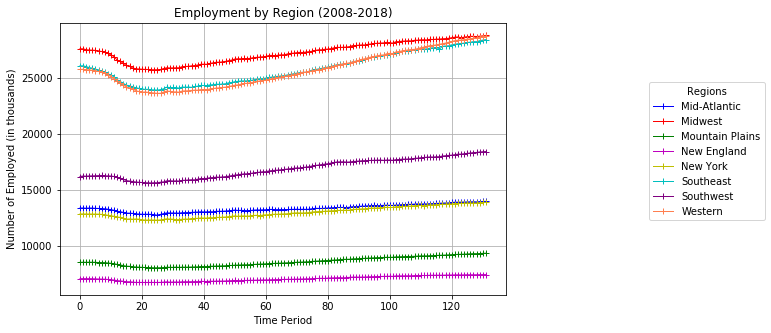

In [59]:
# Plot regional employment over time
plt.figure(figsize=(8, 5))
mid_atl = plt.plot(total_regions.index, total_regions['Mid-Atlantic'], marker="+",color="blue", linewidth=1, label="Mid-Atlantic")
midwest = plt.plot(total_regions.index, total_regions['Midwest'], marker="+",color="red", linewidth=1, label="Midwest")
mountain_plains = plt.plot(total_regions.index, total_regions['Mountain Plains'], marker="+",color="g", linewidth=1, label="Mountain Plains")
new_england = plt.plot(total_regions.index, total_regions['New England'], marker="+",color="m", linewidth=1, label="New England")
new_york = plt.plot(total_regions.index, total_regions['New York'], marker="+",color="y", linewidth=1, label="New York")
southeast = plt.plot(total_regions.index, total_regions['Southeast'], marker="+",color="c", linewidth=1, label="Southeast")
southwest = plt.plot(total_regions.index, total_regions['Southwest'], marker="+",color="purple", linewidth=1, label="Southwest")
western = plt.plot(total_regions.index, total_regions['Western'], marker="+",color="coral", linewidth=1, label="Western")

plt.title('Employment by Region (2008-2018)')
plt.xlabel('Time Period')
plt.ylabel('Number of Employed (in thousands)')
plt.grid()

legend = plt.legend(title='Regions', loc='upper center',  bbox_to_anchor=(1.45, 0.8))

plt.savefig("./Region Figs/region_over_time.png")

In [25]:
# Show regional stats
total_regions.describe()

Region,Year,Mid-Atlantic,Midwest,Mountain Plains,New England,New York,Southeast,Southwest,Western
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,2013.000000,13365.000000,27253.765909,8633.296212,7104.613636,13009.397727,25773.359091,16898.871970,25696.362879
std,3.174324,329.627607,940.841048,401.045116,224.398763,487.809165,1379.541711,862.873491,1577.968766
min,2008.000000,12747.900000,25708.900000,8074.900000,6771.400000,12318.900000,23897.300000,15631.500000,23606.300000
25%,2010.000000,13113.525000,26441.500000,8272.325000,6901.275000,12577.950000,24474.175000,16146.850000,24210.425000
50%,2013.000000,13314.200000,27303.850000,8565.200000,7082.900000,12876.000000,25551.250000,16821.550000,25498.050000
75%,2016.000000,13631.125000,28088.500000,8999.350000,7317.650000,13446.400000,27008.475000,17663.100000,27047.450000
max,2018.000000,13993.600000,28767.900000,9374.800000,7471.900000,13893.700000,28392.700000,18427.900000,28701.600000


In [31]:
# Find regression lines for growth of regional employment

mid_atlantic_rate = total_regions.iloc[:, 2]
ma_slope, ma_int, ma_r, ma_p, ma_std_err = stats.linregress(total_regions.index, mid_atlantic_rate)
ma_fit = ma_slope * total_regions.index + ma_int

midwest_rate = total_regions.iloc[:, 3]
mw_slope, mw_int, mw_r, mw_p, mw_std_err = stats.linregress(total_regions.index, midwest_rate)
mw_fit = mw_slope * total_regions.index + mw_int

mtplains_rate = total_regions.iloc[:, 4]
mt_slope, mt_int, mt_r, mt_p, mt_std_err = stats.linregress(total_regions.index, mtplains_rate)
mt_fit = mt_slope * total_regions.index + mt_int

new_england_rate = total_regions.iloc[:, 5]
ne_slope, ne_int, ne_r, ne_p, ne_std_err = stats.linregress(total_regions.index, new_england_rate)
ne_fit = ne_slope * total_regions.index + ne_int

new_york_rate = total_regions.iloc[:, 6]
ny_slope, ny_int, ny_r, ny_p, ny_std_err = stats.linregress(total_regions.index, new_york_rate)
ny_fit = ny_slope * total_regions.index + ny_int

southeast_rate = total_regions.iloc[:, 7]
se_slope, se_int, se_r, se_p, se_std_err = stats.linregress(total_regions.index, southeast_rate)
se_fit = se_slope * total_regions.index + se_int

southwest_rate = total_regions.iloc[:, 8]
sw_slope, sw_int, sw_r, sw_p, sw_std_err = stats.linregress(total_regions.index, southwest_rate)
sw_fit = sw_slope * total_regions.index + sw_int

west_rate = total_regions.iloc[:, 9]
we_slope, we_int, we_r, we_p, we_std_err = stats.linregress(total_regions.index, west_rate)
we_fit = we_slope * total_regions.index + we_int


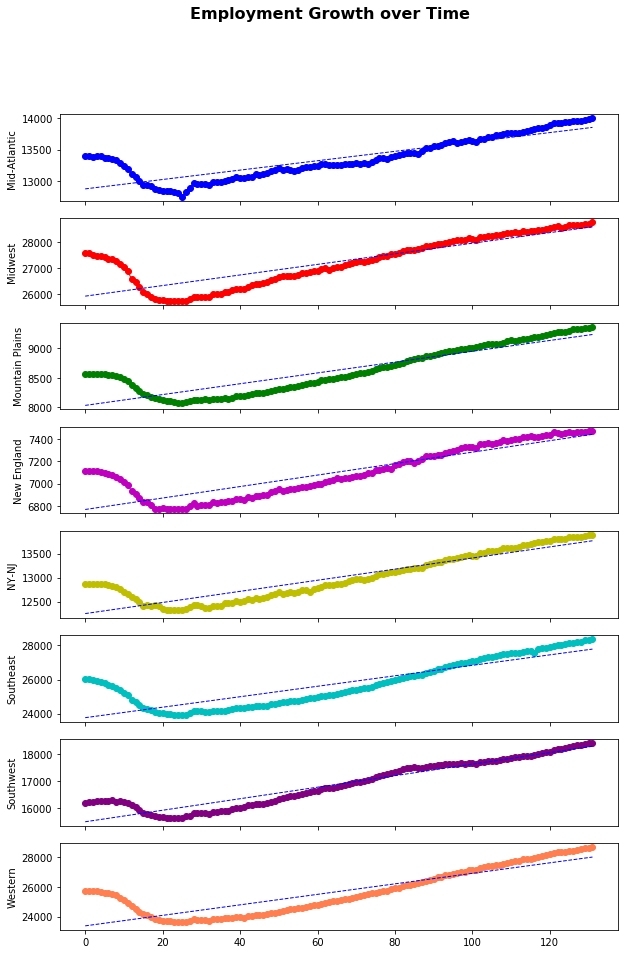

In [58]:
# Plot regional growth with trend lines 
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, sharex=True, figsize=(10, 15))
fig.suptitle("Employment Growth over Time", fontsize=16, fontweight="bold")

ax1.plot(total_regions.index, mid_atlantic_rate, linewidth=1, marker="o", color="blue")
ax1.plot(total_regions.index, ma_fit, "b--", linewidth=1)
ax1.set_ylabel("Mid-Atlantic")

ax2.plot(total_regions.index, midwest_rate, linewidth=1, marker="o", color="red")
ax2.plot(total_regions.index, mw_fit, "b--", linewidth=1)
ax2.set_ylabel("Midwest")

ax3.plot(total_regions.index, mtplains_rate, linewidth=1, marker="o", color="g")
ax3.plot(total_regions.index, mt_fit, "b--", linewidth=1)
ax3.set_ylabel("Mountain Plains")

ax4.plot(total_regions.index, new_england_rate, linewidth=1, marker="o", color="m")
ax4.plot(total_regions.index, ne_fit, "b--", linewidth=1)
ax4.set_ylabel("New England")

ax5.plot(total_regions.index, new_york_rate, linewidth=1, marker="o", color="y")
ax5.plot(total_regions.index, ny_fit, "b--", linewidth=1)
ax5.set_ylabel("NY-NJ")

ax6.plot(total_regions.index, southeast_rate, linewidth=1, marker="o", color="c")
ax6.plot(total_regions.index, se_fit, "b--", linewidth=1)
ax6.set_ylabel("Southeast")

ax7.plot(total_regions.index, southwest_rate, linewidth=1, marker="o", color="purple")
ax7.plot(total_regions.index, sw_fit, "b--", linewidth=1)
ax7.set_ylabel("Southwest")

ax8.plot(total_regions.index, west_rate, linewidth=1, marker="o", color="coral")
ax8.plot(total_regions.index, we_fit, "b--", linewidth=1)
ax8.set_ylabel("Western")

plt.savefig("./Region Figs/region_regressions.png")

In [51]:
# Show slopes of regression to compare growth
slopes = pd.DataFrame({"Regions" : region, 
                       "Slopes" : [ne_slope, ny_slope, ma_slope, se_slope, mw_slope, sw_slope, mt_slope, we_slope]})
slopes = slopes.sort_values(by=["Slopes"], ascending=False)
slopes.reset_index(drop=True)

,Regions,Slopes
0,Western,35.507082
1,Southeast,30.764085
2,Southwest,21.428463
3,Midwest,20.534887
4,New York,11.576437
5,Mountain Plains,9.242089
6,Mid-Atlantic,7.413123
7,New England,5.100277
